In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
Am    =    2.756769e-02 
Vmm   =    7.704963e+01
b1m   =    -2.440201e+01 
b2m   =    4.802552e+01 
c1m   =    -1.712336e-01 
c2m    =   4.493341e-02 
d1m     =  4.181831e-03 
d2m     =  4.526902e-03 
g_bar  =    8.256491e-02 

In [117]:
V_amp = np.arange(-100,120,20)
V_amp_str = [str(elem) for elem in V_amp]

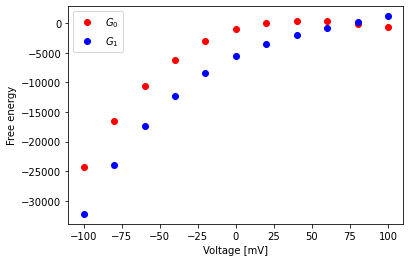

In [118]:
G0 = []
G1 = []
for i, V in enumerate(V_amp):

    G0.append(b1m*(V_amp[i]-Vmm) + c1m*(V_amp[i]-Vmm)**2 + d1m*(V_amp[i]-Vmm)**3)
    G1.append(b2m*(V_amp[i]-Vmm) + c2m*(V_amp[i]-Vmm)**2 + d2m*(V_amp[i]-Vmm)**3)
    
plt.plot(V_amp, G0, 'o', color = 'r', label = '$G_{0}$')
plt.plot(V_amp, G1, 'o', color = 'b', label = '$G_{1}$')
plt.xlabel('Voltage [mV]')
plt.ylabel('Free energy')
plt.legend()

plt.show()


In [103]:
Am   =     5.300089e-02 
Vmm   =    -5.599999e+01 
b1m   =    -2.599956e+02 
b2m   =    6.485390e+01 
c1m   =    2.199925e+00
c2m   =    2.019927e+00 
d1m   =    5.200352e-03 
d2m   =    3.600145e-02
gbar  =    3.500000e+01 

In [82]:
V_amp = np.arange(-100,120,20)
V_amp_str = [str(elem) for elem in V_amp]

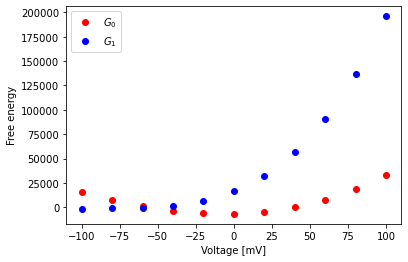

In [85]:
G0 = []
G1 = []
for i, V in enumerate(V_amp):

    G0.append(b1m*(V_amp[i]-Vmm) + c1m*(V_amp[i]-Vmm)**2 + d1m*(V_amp[i]-Vmm)**3)
    G1.append(b2m*(V_amp[i]-Vmm) + c2m*(V_amp[i]-Vmm)**2 + d2m*(V_amp[i]-Vmm)**3)
    
plt.plot(V_amp, G0, 'o', color = 'r', label = '$G_{0}$')
plt.plot(V_amp, G1, 'o', color = 'b', label = '$G_{1}$')
plt.xlabel('Voltage [mV]')
plt.ylabel('Free energy')
plt.legend()
plt.show()

In [21]:
a = 5e-6 # Patch radius [m]
k = 0.24 # Area Compression modulus [N.m^-1]
def displacement_solver(Ps, a, k):
    """
        Find the displacement for a given applied Pressure
        
        Parameters
        ----------
        
        Ps : float
            Pressure attributed to the circumferential tension 
            per unit length in the membrane [Pa]
        a : float
                Patch radius  [m]
        k : float
            Area Compression modulus [N.m^-1]
    
        Returns
        -------
        Z : array
            Patch displacement [m]
        """
    params = [2*k,-Ps*a**2,0,-Ps*a**4]

    Z = np.roots(params)
    Z = Z[np.isreal(Z)].real

    return Z[0]

In [22]:
def set_R_curv(Z):
    R = (a**2 + Z**2) / (2*Z)
    return R


In [23]:
def set_tension(R,Ps):
    Ts = (R * Ps)

    return Ts 

In [52]:
#fit h0
Ah   =     5.796801e-02 
C      =   -4.589622e+02 
D       =  -2.063007e+01 
delta_S  = 6.820357e+01 
density  = 2.561223e+00 
gamma    = 5.627326e-01
z1       = -9.655673e+03 
z2       = 2.365535e+03

In [35]:
#h = 1/2

Ah   =     5.457582e-02 
C     =    -4.929852e-01
D     =    -1.624593e+01
delta_S =  8.897298e+01
density =  6.878828e+00
gamma   =  4.134328e-01 
z1      =  4.163086e+03
z2      =  -1.699943e+03

In [53]:
import scipy.constants as cst

In [54]:
#from scipy.optimize import fmin as simplex
#DEFINING CONSTANTS
R =cst.R #gas constant [J mol^−1 K^−1]
F= 96485.33212 #[C mol^-1] Faraday constant
T = 273.15 + 25 # [kelvin] temperature const

# Compute reveral potential, using Nernst equation: 
ki = 150e-3 #[M] intracellular concentration
ko = 15e-3   #[M] extracellular concentration
z = 1
E_k = ((R*T)/(z*F))*np.log(ko/ki)*1e3
print(f'Reversal potential computed with Nernst equation:{E_k:3f} mV')

Reversal potential computed with Nernst equation:-59.159350 mV


In [55]:
V_hold = 0 # [mV]
P_arr = [2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25]
P_arr_str = []
P_arr_str = [str(elem) for elem in P_arr]

In [56]:
G0m = []
G1m = []
G0h = []
G1h = []

for i, value in enumerate(P_arr_str):
    
    Ps_mmHg = P_arr[i]
    Ps_PA = Ps_mmHg * 133.322 
    Z_15mmHg = displacement_solver(Ps_PA,a,k)
    R_curv = set_R_curv(Z_15mmHg)
    Ts = set_tension(R_curv,Ps_PA)

    G0m.append(b1m*(V_hold-Vmm) + c1m*(V_hold-Vmm)**2 + d1m*(V_hold-Vmm)**3 - gamma*cst.N_A*Ts*delta_S*10**(-20))
    G1m.append(b2m*(V_hold-Vmm) + c2m*(V_hold-Vmm)**2 + d2m*(V_hold-Vmm)**3 - (gamma-1)*cst.N_A*Ts*delta_S*10**(-20))

    G0h.append(z1 - C*cst.N_A*Ts*10**(-20))
    G1h.append(z2 - D*cst.N_A*Ts*10**(-20))
    



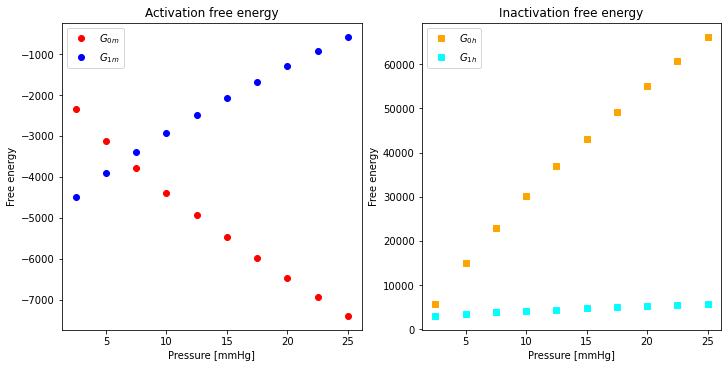

In [57]:
fig, ax= plt.subplots(1, 2, constrained_layout=True, figsize=(10,5))

ax[0].plot(P_arr, G0m, 'o', color = 'r', label = '$G_{0m}$')
ax[0].plot(P_arr, G1m, 'o', color = 'b', label = '$G_{1m}$')

ax[0].set_xlabel('Pressure [mmHg]')
ax[0].set_ylabel('Free energy')
ax[0].set_title('Activation free energy')
ax[0].legend()

plt.plot(P_arr, G0h, 's', color = 'orange', label = '$G_{0h}$')
plt.plot(P_arr, G1h, 's', color = 'cyan', label = '$G_{1h}$')
ax[1].set_xlabel('Pressure [mmHg]')
ax[1].set_ylabel('Free energy')
ax[1].set_title('Inactivation free energy')
ax[1].legend()

fig.show()


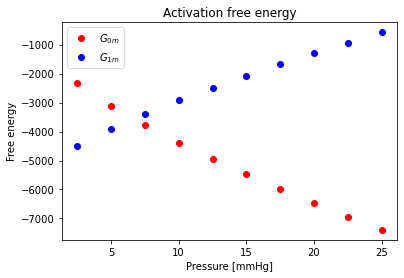

In [58]:
plt.plot(P_arr, G0m, 'o', color = 'r', label = '$G_{0m}$')
plt.plot(P_arr, G1m, 'o', color = 'b', label = '$G_{1m}$')

plt.xlabel('Pressure [mmHg]')
plt.ylabel('Free energy')
plt.title('Activation free energy')
plt.legend()
plt.show()

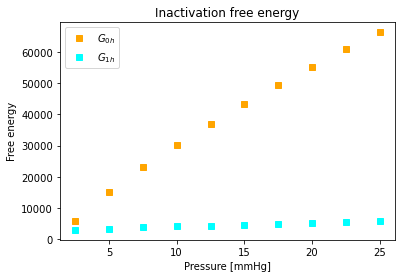

In [59]:
plt.plot(P_arr, G0h, 's', color = 'orange', label = '$G_{0h}$')
plt.plot(P_arr, G1h, 's', color = 'cyan', label = '$G_{1h}$')
plt.xlabel('Pressure [mmHg]')
plt.ylabel('Free energy')
plt.title('Inactivation free energy')
plt.legend()
plt.show()